In [4]:
# Example: PCA on Iris dataset
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [5]:

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

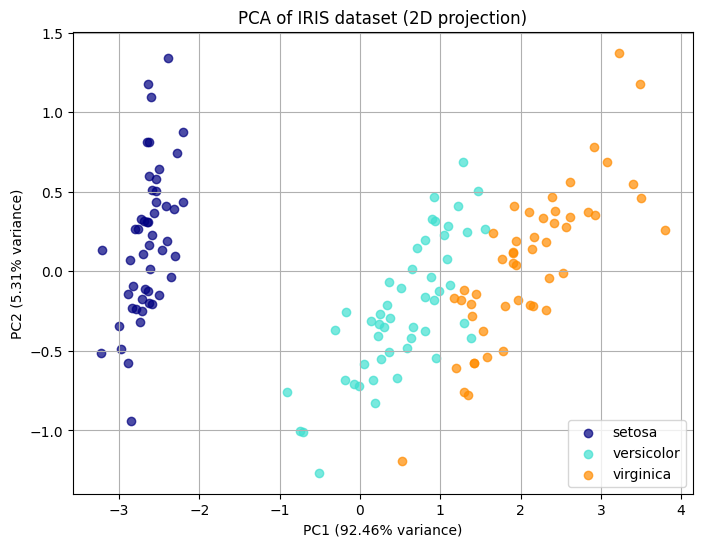

Explained variance ratio: [0.92461872 0.05306648]


In [9]:

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=0.7,
                color=color, label=target_name)

plt.legend(loc='best', shadow=False)
plt.title("PCA of IRIS dataset (2D projection)")
plt.xlabel("PC1 (%.2f%% variance)" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 (%.2f%% variance)" % (pca.explained_variance_ratio_[1]*100))
plt.grid(True)
plt.show()

# Print variance explained
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio (PC1, PC2): [0.92461872 0.05306648]


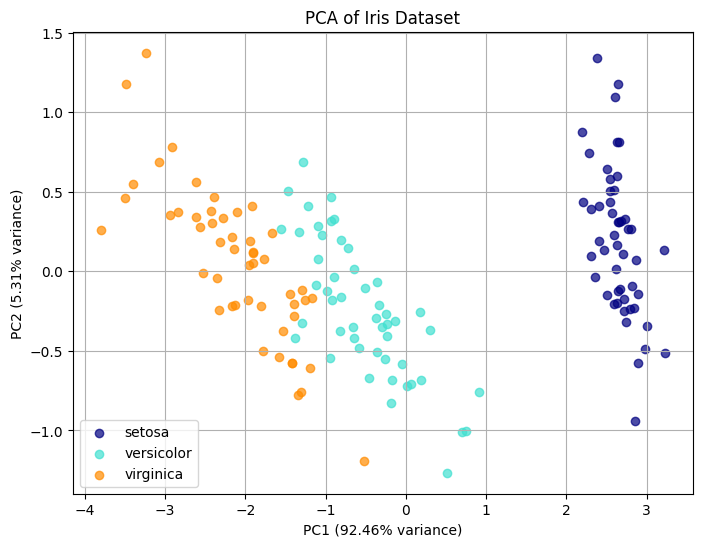

In [1]:
# PCA from scratch with math + visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# -----------------------------------------------------------
# Step 1: Standardization
# Formula: X_centered = X - mean(X)
# (center each feature to have mean 0)
# -----------------------------------------------------------
X_meaned = X - np.mean(X, axis=0)

# -----------------------------------------------------------
# Step 2: Covariance Matrix
# Formula: Σ = (1/n) * X^T * X
# (measures feature variance & correlation)
# -----------------------------------------------------------
cov_matrix = np.cov(X_meaned, rowvar=False)

# -----------------------------------------------------------
# Step 3: Eigen Decomposition
# Formula: Σv = λv
# (solve for eigenvalues λ and eigenvectors v)
# -----------------------------------------------------------
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# -----------------------------------------------------------
# Step 4: Sort Eigenvectors
# (order by descending eigenvalue size λ)
# -----------------------------------------------------------
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# -----------------------------------------------------------
# Step 5: Select Top k Eigenvectors
# (choose first 2 principal components)
# -----------------------------------------------------------
eigenvectors_subset = eigenvectors[:, 0:2]

# -----------------------------------------------------------
# Step 6: Projection onto Principal Components
# Formula: X_pca = X_centered · V_k
# (reduce dimension by linear projection)
# -----------------------------------------------------------
X_reduced = np.dot(X_meaned, eigenvectors_subset)

# -----------------------------------------------------------
# Step 7: Explained Variance
# Formula: variance_ratio = λ_i / Σ λ
# (how much info each component captures)
# -----------------------------------------------------------
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained variance ratio (PC1, PC2):", explained_variance_ratio[:2])

# ---- Visualization ----
colors = ['navy', 'turquoise', 'darkorange']
plt.figure(figsize=(8,6))

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], 
                color=color, alpha=0.7, label=target_name)

plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% variance)')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()
